In [2]:
%load_ext autoreload
%autoreload 2

## Data loading

In [35]:
from retrieva import ROOT_PATH
from retrieva.data import get_file_paths
import os
import pathlib
import re
import mistune
import pathlib

data_path = os.path.join(ROOT_PATH, "artifacts/sagemaker_documentation")
df = get_file_paths(data_path)

In [37]:
# pip install mistune
path = df["filepath"].values[0]
text = pathlib.Path(path).read_text(encoding='utf-8')
markdown = mistune.create_markdown(renderer=None)
markdown(text)

[{'type': 'heading',
  'attrs': {'level': 1},
  'style': 'axt',
  'children': [{'type': 'text',
    'raw': 'AWS::SageMaker::ModelBiasJobDefinition NetworkConfig'},
   {'type': 'inline_html',
    'raw': '<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig">'},
   {'type': 'inline_html', 'raw': '</a>'}]},
 {'type': 'blank_line'},
 {'type': 'paragraph',
  'children': [{'type': 'text',
    'raw': 'Networking options for a job, such as network traffic encryption between containers, whether to allow inbound and outbound network calls to and from containers, and the VPC subnets and security groups to use for VPC'},
   {'type': 'text', 'raw': '-'},
   {'type': 'text', 'raw': 'enabled jobs'},
   {'type': 'text', 'raw': '.'}]},
 {'type': 'blank_line'},
 {'type': 'heading',
  'attrs': {'level': 2},
  'style': 'axt',
  'children': [{'type': 'text', 'raw': 'Syntax'},
   {'type': 'inline_html',
    'raw': '<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig-synt

## Checking the char distribution of the documentation

In [3]:
for i, r in df.iterrows():
    text = pathlib.Path(r["filepath"]).read_text(encoding='utf-8')
    words_len = len(re.findall(r'\w+', text))
    chars_len = len(text)
    df.loc[i, ["words_len", "chars_len"]] = words_len, chars_len

array([[<AxesSubplot: title={'center': 'words_len'}>,
        <AxesSubplot: title={'center': 'chars_len'}>]], dtype=object)

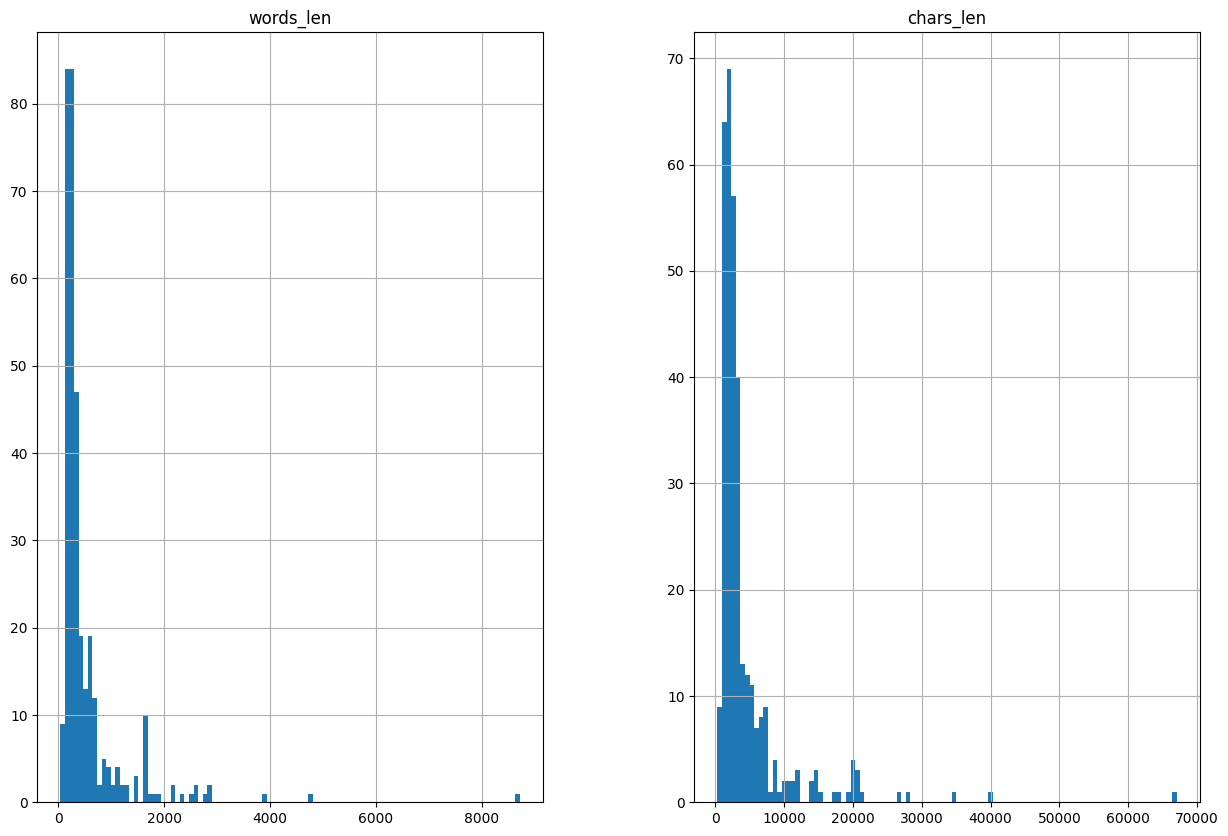

In [4]:
df[["words_len", "chars_len"]].hist(bins=100, figsize=(15, 10))

# Extracting tags from filepath

In [6]:
df["filepath"].values[0]

'/home/peterdays/Documents/personal/retrieva/artifacts/sagemaker_documentation/aws-properties-sagemaker-modelbiasjobdefinition-networkconfig.md'

In [20]:
df["filename"].str.split("-").str.len().min(), df["filename"].str.split("-").str.len().max()

(1, 7)

In [13]:
df["section"] = df["filename"].str.split("-").str[0]

In [14]:
df["subsection"] = df["filename"].str.split("-").str[1]

In [16]:
df["topic"] = df["filename"].str.split("-").str[2]

In [25]:
df["subtopic"] = df["filename"].str.split("-").str[3]

In [26]:
df["subsubtopic"] = df["filename"].str.split("-").str[4:]
df["subsubtopic"] = df["subsubtopic"].apply(lambda x: "-".join(x))

In [32]:
df[["section", "subsection", "topic", "subtopic", "subsubtopic"]].drop_duplicates().value_counts()

section     subsection  topic      subtopic                subsubtopic                 
automating  sagemaker   with       eventbridge                                             1
aws         properties  sagemaker  monitoringschedule      scheduleconfig                  1
                                                           networkconfig                   1
                                                           monitoringscheduleconfig        1
                                                           monitoringresources             1
                                                                                          ..
                                   modelbiasjobdefinition  monitoringoutputconfig          1
                                                           monitoringoutput                1
                                                           monitoringgroundtruths3input    1
                                                           modelbiasjobinpu